In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

df = pd.read_csv('stud_math.csv')

In [7]:
nominate = ['higher', 'internet', 'romantic', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'Mjob', 'Fjob', 'reason', 'guardian',
            'address', 'famsize', 'Pstatus', 'school', 'sex']

numeric = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
           'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
и
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [56]:
for feature in numeric:
    print(df[feature].value_counts(dropna=False))
    

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64
2.0    106
3.0     96
4.0     89
1.0     78
NaN     24
0.0      2
Name: Fedu, dtype: int64
1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64
2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64
0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64
 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.

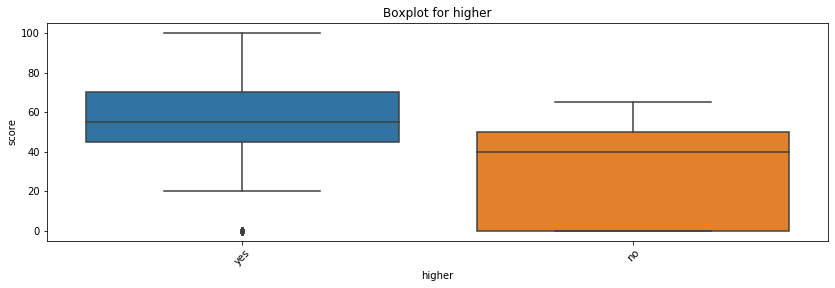

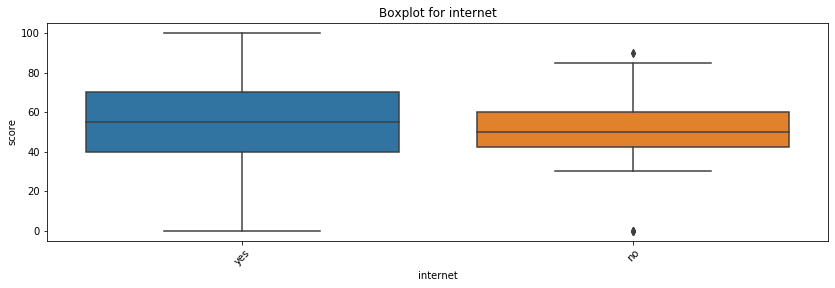

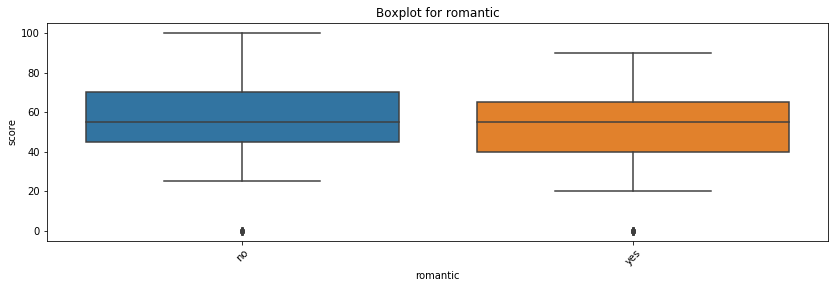

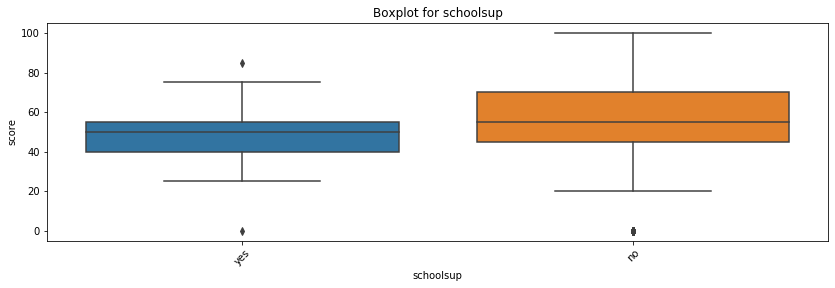

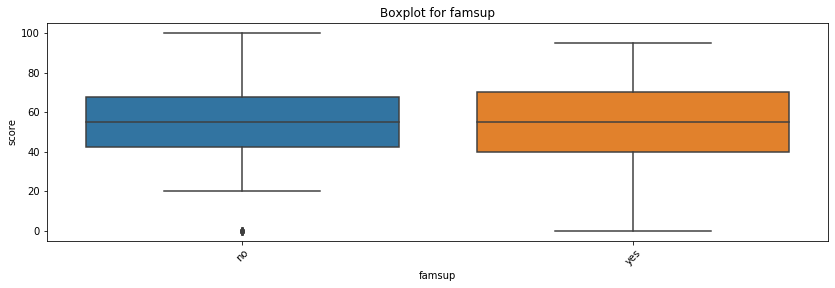

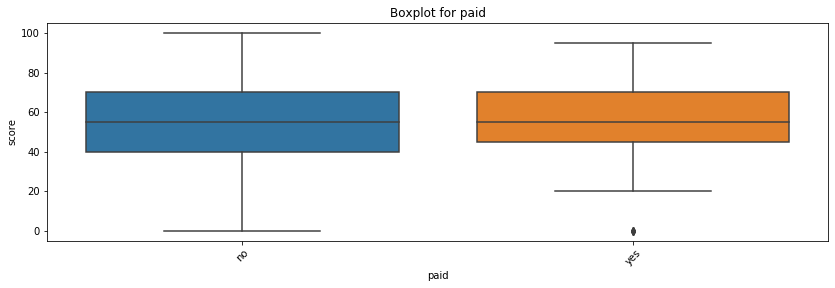

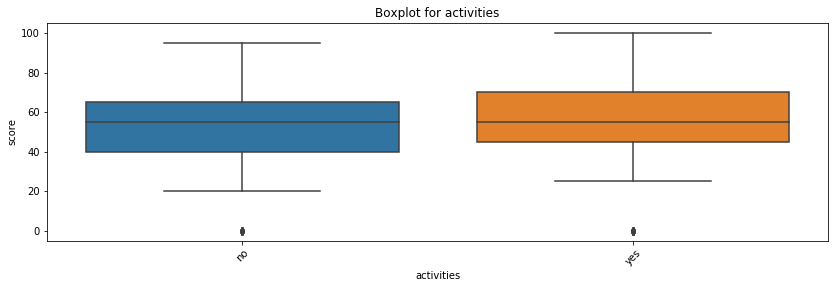

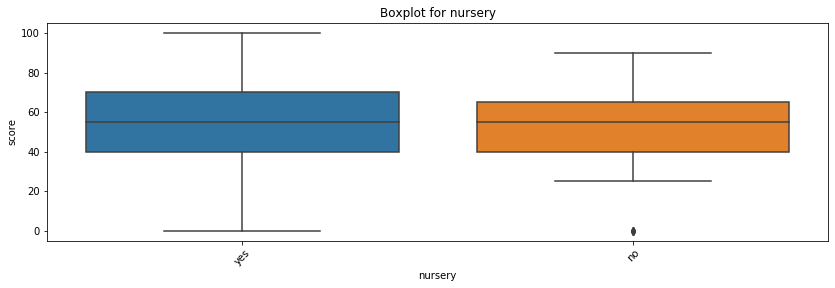

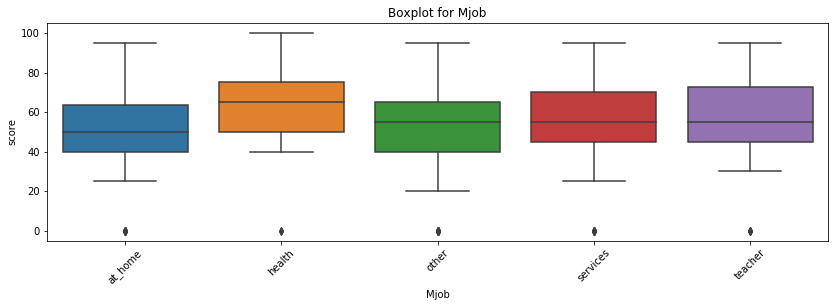

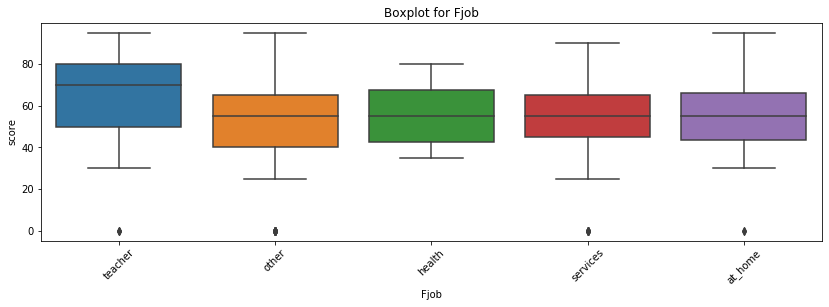

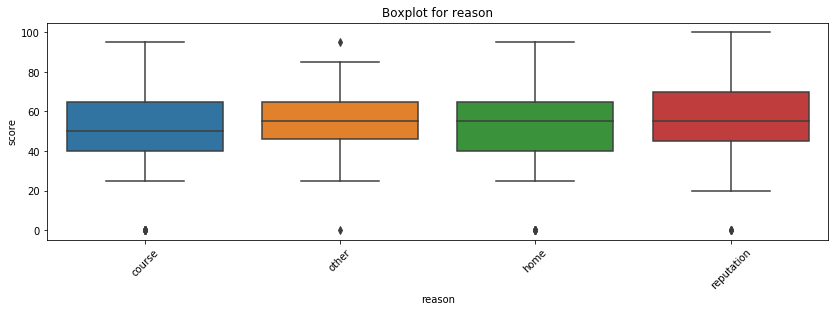

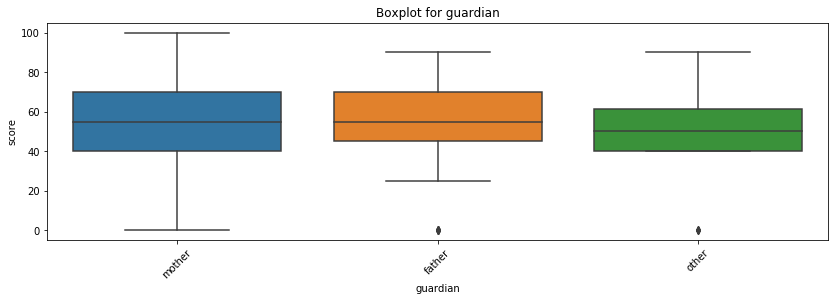

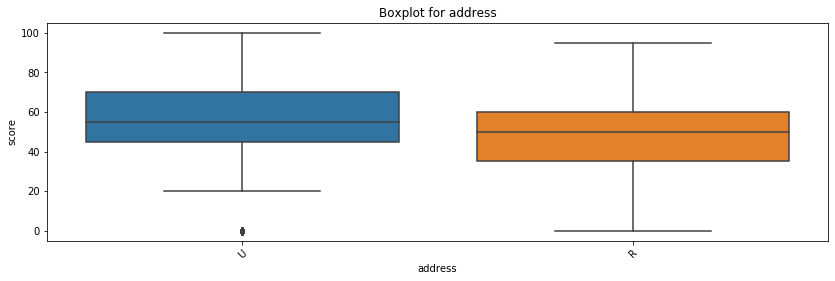

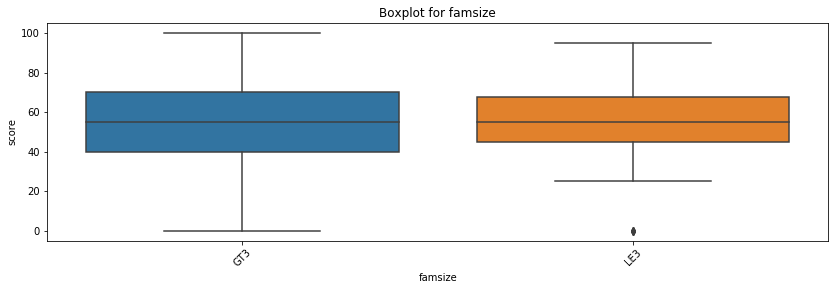

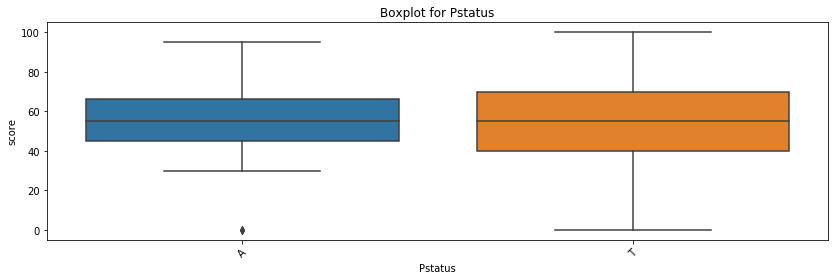

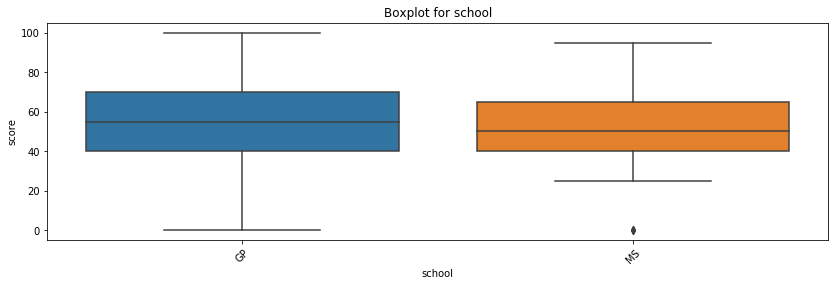

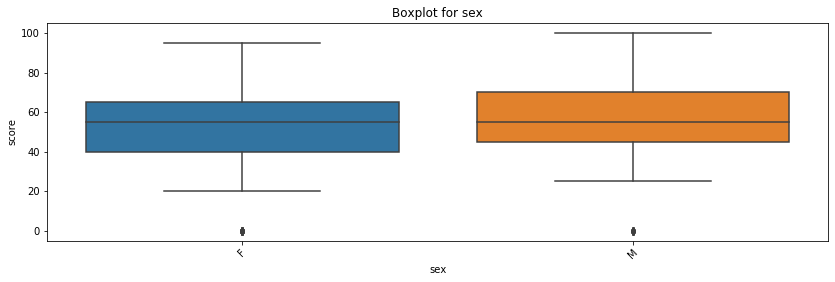

In [9]:
for col in nominate:
    get_boxplot(col)

In [28]:
df.apply(lambda x: pd.isna(x).sum(), axis=1).value_counts()

1    131
2     98
0     97
3     47
4     15
5      5
6      2
dtype: int64

In [7]:
print(f'There are {len(df.dropna())} rows in dataset without missing values \
of {len(df)} total rows')

There are 97 rows in dataset without missing values of 395 total rows


In [6]:
print(f'There are {df.isnull().any().sum()} columns in dataset with missing \
values.')

There are 27 columns in dataset with missing values.


In [ ]:
# Пропуски разбросаны по датафрейму, простое удаление строк с пропусками 
# приводит к потере около 3/4 всех данных.
# Необходима работа с пропусками.

In [7]:
print(f'{df.shape[0]} samples and {df.shape[1]} features in the dataset.')

395 samples and 30 features in the dataset.


Признак **school**

In [28]:
df.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

Пропусков в данных нет. В датасете содержатся данные об учениках только двух 
школ. Поиск не дал результатов, что по этим аббревиатурам можно 
категоризировать школу (например государственная, муниципальная или частная). 
Поэтому поскольку по описанию задачи я склоняюсь, что модель будет 
предсказывать результат для учеников не только из этих двух конкретных школ,
то этот признак можно отбросить.

Признак **sex**

In [27]:
df.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

Пропусков нет, альтернативных полов нет. Не побоимся гнева LGBT и SJW сообществ и посмотрим влияет ли пол на среднюю оценку:

In [16]:
df.groupby('sex').score.mean()

sex
F    50.098039
M    54.648649
Name: score, dtype: float64

Есть различия примерно в 10%. Признак оказывает влияние на целевую переменную, оставляем для дальнейшего анализа.

#### Признак age

In [26]:
df.age.value_counts(dropna=False)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

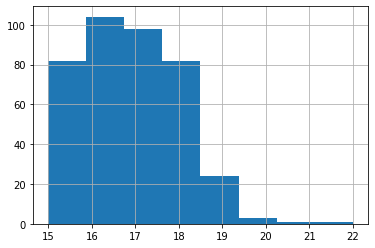

In [28]:
df.age.hist(bins=8)

Пропусков и выбросов нет. Резкое падение количества школьников после 18 лет объяснимо, но малое количество снижает
статистическую достоверность данных для этой части учащихся. Добавим новый признак **old** равный 0, если возраст меньше 18 лет, и 1, если больше.

#### Признак address

In [25]:
df.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

In [40]:
df.groupby('address').score.mean()

address
R    46.927711
U    53.573883
Name: score, dtype: float64

#### Признак famsize

In [24]:
df.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

#### Признак Pstatus

In [5]:
df.Pstatus.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

#### Признак Medu

In [8]:
df.Medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

#### Признак Fedu

In [9]:
df.Fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

Значение 40 явный выброс, скорее всего приписан лишний "0", заменим на 4.

#### Признаки Fjob, Mjob, reason, guardian

In [13]:
df.Fjob.value_counts(dropna=False)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [15]:
df.Mjob.value_counts(dropna=False)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

In [16]:
df.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

In [17]:
df.guardian.value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

Пропуски можно заменить на значение 'other'

In [19]:
df.traveltime.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [22]:
df.studytime.value_counts(dropna=False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

In [23]:
df.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

TypeError: 'PairGrid' object is not subscriptable

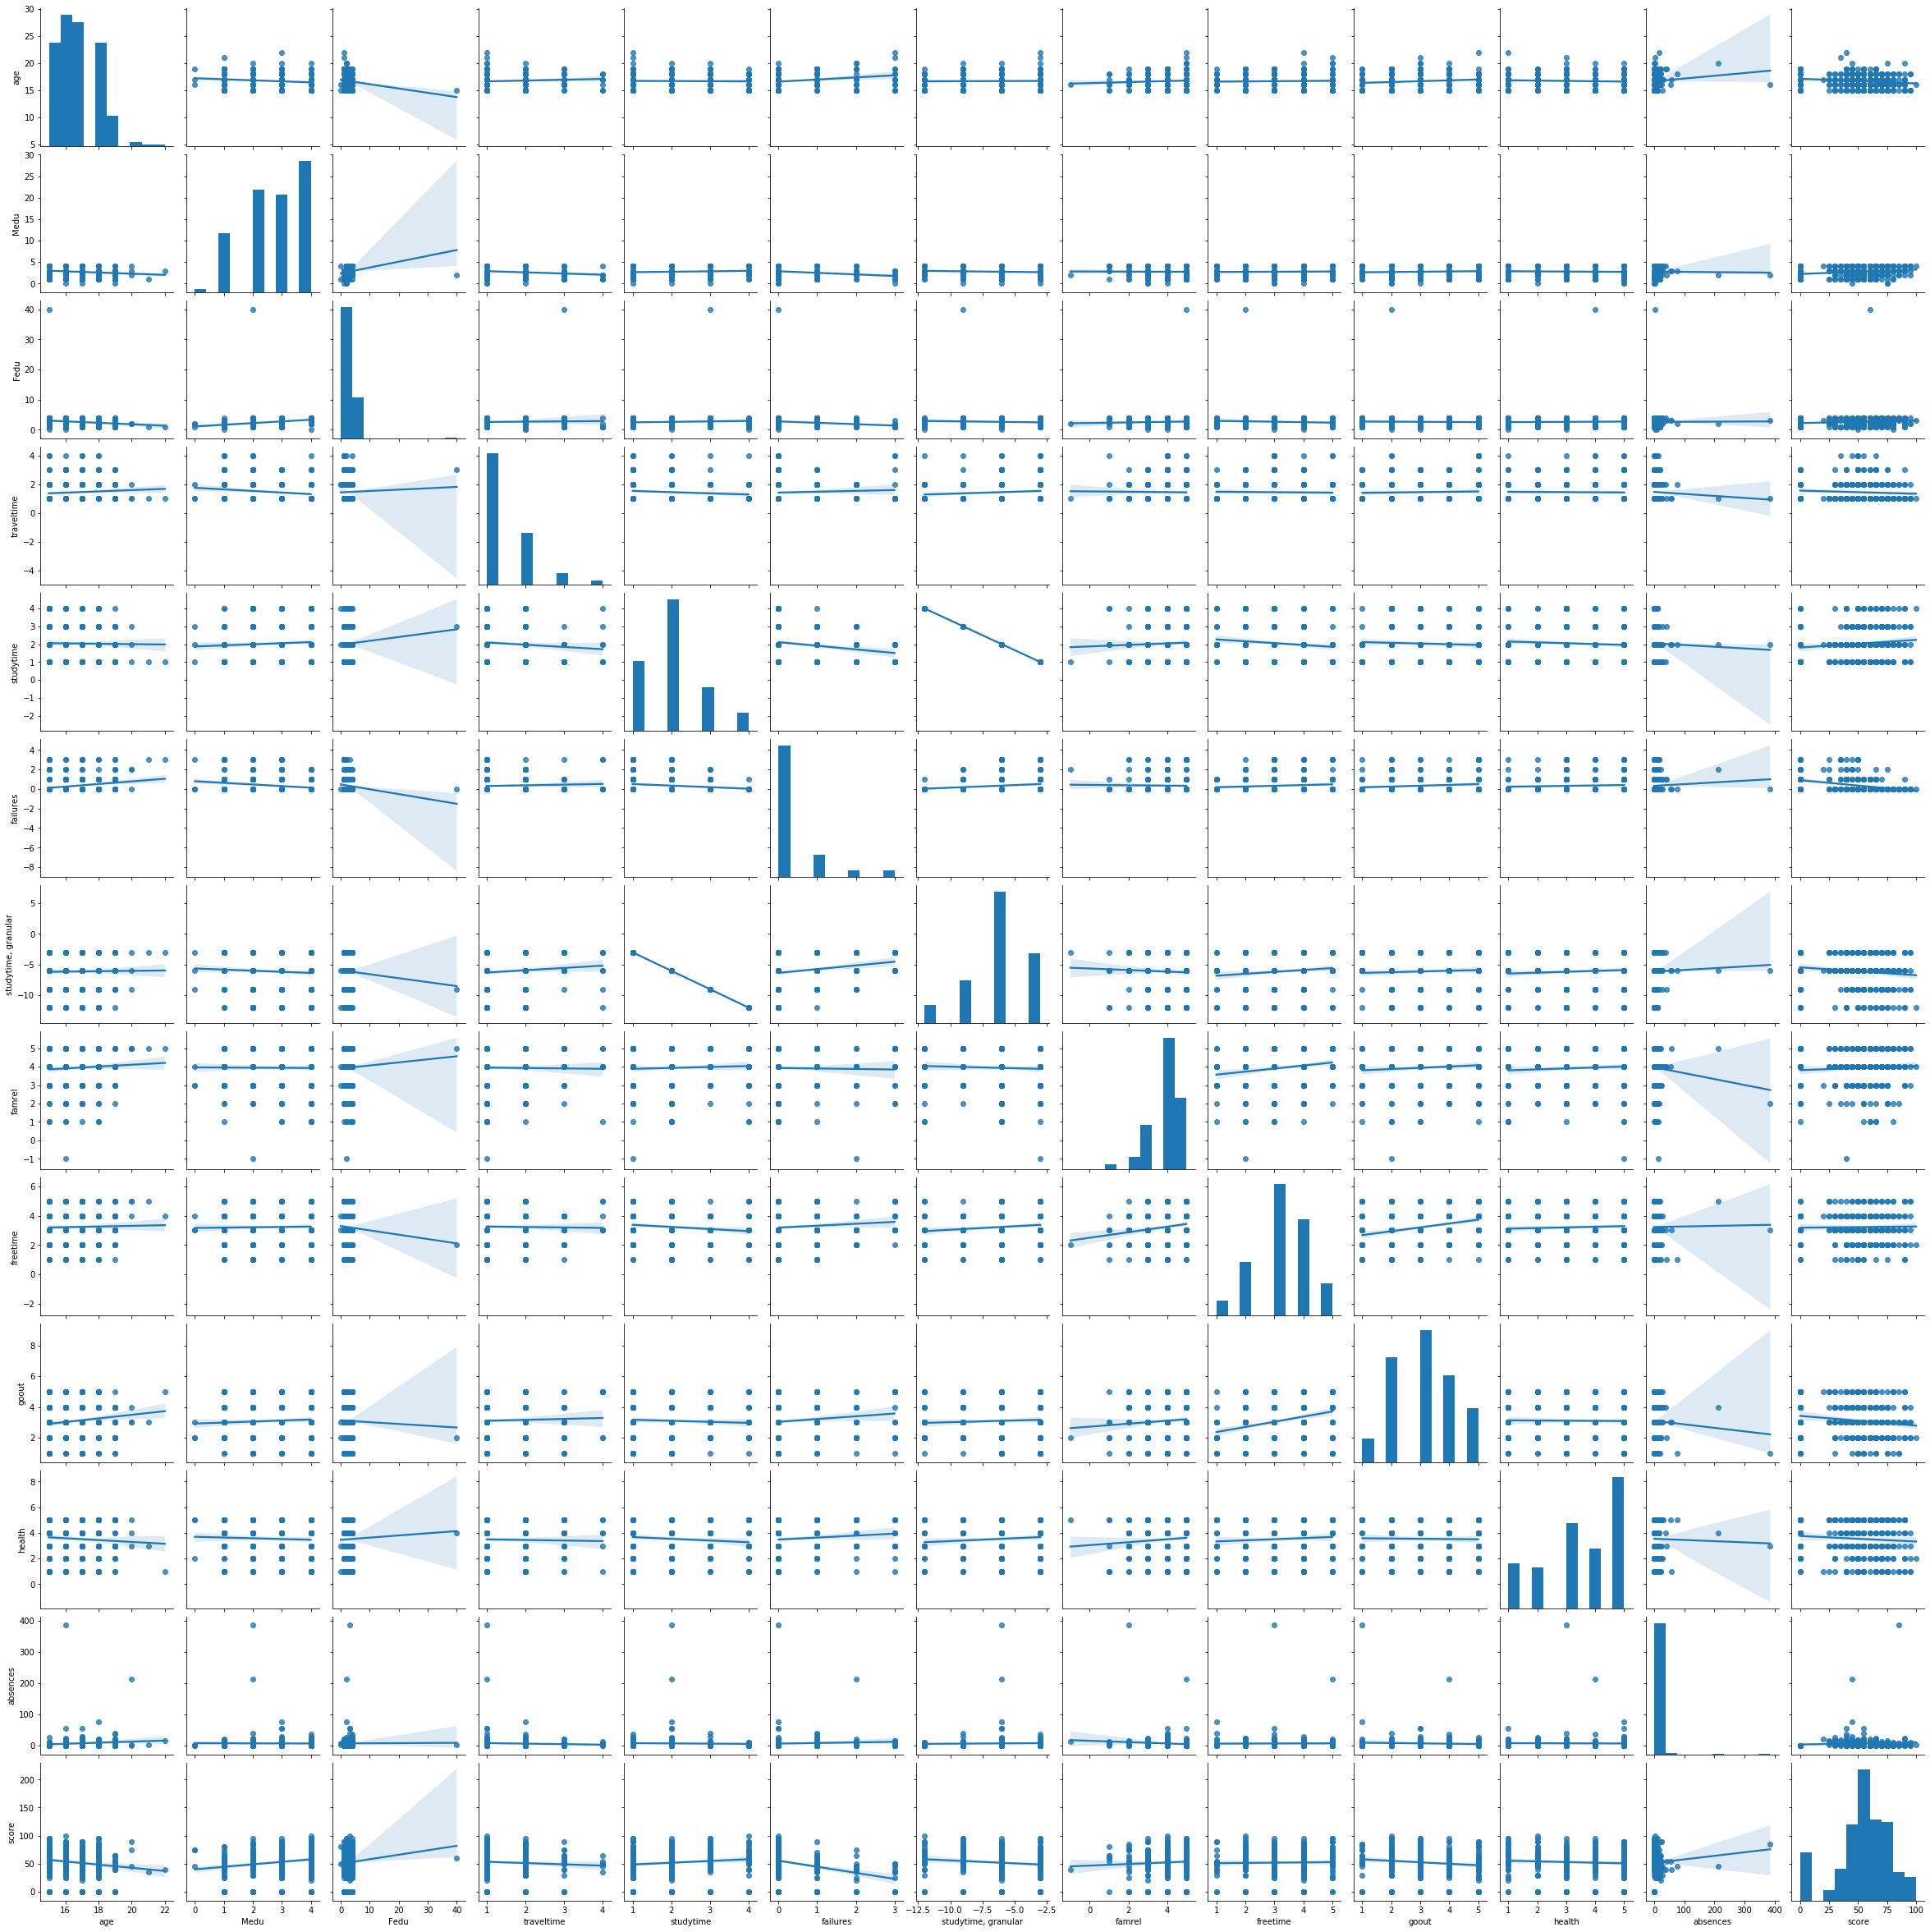

In [3]:
sns.pairplot(df, kind='reg')[:1]

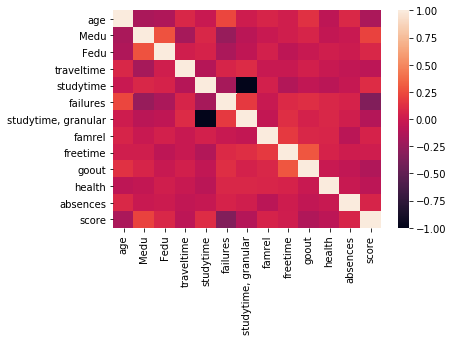

In [11]:
sns.heatmap(df.corr())

In [19]:
def get_stat_dif(column):
    cols = df.loc[:, column]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
           df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                  <= 0.05/len(combinations_all):
            # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки',\
                  column)
            break

In [21]:
df = df.dropna()
for col in nominate:
    get_stat_dif(col)

In [40]:
#Начинаем править датасет по выводам
df.loc[df.Fedu==40, 'Fedu'] = 4.0
df.drop(columns='studytime, granular', inplace=True)

In [13]:
df.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

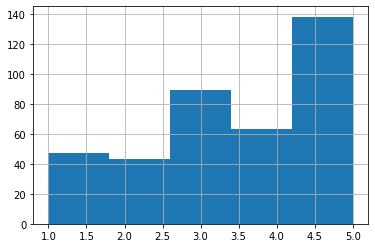

In [15]:
df.health.hist(bins=5)

In [22]:
df.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [28]:
df.score.isna().index

RangeIndex(start=0, stop=395, step=1)

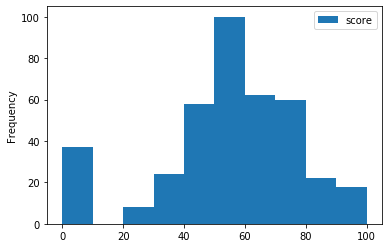

In [35]:
df.plot(kind='hist', y=['score'])

In [47]:
df.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

In [49]:
df.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

In [50]:
df.famsup.value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

In [52]:
df.paid.value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

In [55]:
df.activities.value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64